In [5]:
#importing the  requried packages
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split

In [6]:
#loading the csv files into dataframes
dead = pd.read_csv('gender_submission.csv', sep=',')
train_data= pd.read_csv('train.csv', sep=',')
test_data= pd.read_csv('test.csv', sep=',')
#merging the test data and the dead data
test_merge = test_data.merge(dead, on = 'PassengerId')
complete_data = [train_data, test_merge]
#dataframe with train, test and dead data
result = pd.concat(complete_data)

C:\Users\saiha\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


In [7]:
result.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,373450


In [8]:
result.info()
result.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       1309 non-null int64
Ticket         1309 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 132.9+ KB


Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived          0
Ticket            0
dtype: int64

In [51]:
#replace nan values in AGE feature with mean of age values
#result['Age'].dropna()
#result['Age'].fillna(result['Age'].mean(), inplace=True)
#import numpy as np
#replacing nan values with the mean value
result['Age'] = result['Age'].replace(np.nan, 30)


In [14]:
import re

# A function to get the title from a name.
def get_title(name):
    # Use a regular expression to search for a title.  Titles always consist of capital and lowercase letters, and end with a period.
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)

In [15]:
titles = result["Name"].apply(get_title)


In [43]:
#mean after dropping the nan values in Age feature
#np.mean(result['Age'])

29.881137667304014

In [53]:
result['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
5      30.0
6      54.0
7       2.0
8      27.0
9      14.0
10      4.0
11     58.0
12     20.0
13     39.0
14     14.0
15     55.0
16      2.0
17     30.0
18     31.0
19     30.0
20     35.0
21     34.0
22     15.0
23     28.0
24      8.0
25     38.0
26     30.0
27     19.0
28     30.0
29     30.0
       ... 
388    21.0
389     6.0
390    23.0
391    51.0
392    13.0
393    47.0
394    29.0
395    18.0
396    24.0
397    48.0
398    22.0
399    31.0
400    30.0
401    38.0
402    22.0
403    17.0
404    43.0
405    20.0
406    23.0
407    50.0
408    30.0
409     3.0
410    30.0
411    37.0
412    28.0
413    30.0
414    39.0
415    38.5
416    30.0
417    30.0
Name: Age, Length: 1309, dtype: float64

In [54]:
result.loc[ result['Age'] <= 16, 'Age']= 0
result.loc[(result['Age'] > 16) & (result['Age'] <= 32), 'Age'] = 1
result.loc[(result['Age'] > 32) & (result['Age'] <= 48), 'Age'] = 2
result.loc[(result['Age'] > 48) & (result['Age'] <= 64), 'Age'] = 3
result.loc[ result['Age'] > 64, 'Age']                           = 4

In [55]:
result['Age'].isnull().sum()

0

In [112]:
for index in range(0,len(result)):
    tuple=result['Cabin'].iloc[index]
    try:tuple = [c for c in result['Cabin'].iloc[index] if c.isalpha()]
        result['Fare'].iloc[index]=result['Fare'].iloc[index]/len(tuple)
        result['Cabin'].iloc[index]=tuple[0]
    except:
        a=1

IndentationError: unexpected indent (<ipython-input-112-69eff6ae28b6>, line 4)

In [104]:
result['Cabin'] = result['Cabin'].replace(to_replace =['A','B','C','D','E','F','G','T',np.nan], value =[1,2,3,4,4,4,4,4,4])

In [10]:
result['Cabin'].isnull().sum()

0

In [11]:
#result["Embarked"].fillna(lambda x: random.choice(result['Embarked'] != np.nan["Embarked"]), inplace =True)
result['Embarked'].fillna('S', inplace = True)

In [12]:
result['Embarked'].isnull().sum()

0

In [13]:
result['Embarked'] = result['Embarked'].replace(to_replace =['S','C','Q'], value =[1,2,3])

In [14]:
result.dropna()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,1.0,4,1,7.250000,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171
1,2.0,3,2,71.283300,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599
2,1.0,4,1,7.925000,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282
3,2.0,3,1,53.100000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803
4,2.0,4,1,8.050000,"Allen, Mr. William Henry",0,5,3,male,0,0,373450
6,3.0,4,1,51.862500,"McCarthy, Mr. Timothy J",0,7,1,male,0,0,17463
7,0.0,4,1,21.075000,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0,349909
8,1.0,4,1,11.133300,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1,347742
9,0.0,4,2,30.070800,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1,237736
10,0.0,4,1,16.700000,"Sandstrom, Miss. Marguerite Rut",1,11,3,female,1,1,PP 9549


In [15]:
result['Fare'].isnull().sum()

1

In [16]:
result.loc[result['Fare'] <= 10, 'Fare']= 0
result.loc[(result['Fare'] > 10) & (result['Fare'] <= 30), 'Fare'] = 1
result.loc[result['Fare'] > 30, 'Fare'] = 2

In [17]:
result['Sex'] = result['Sex'].replace(to_replace =['male','female'], value =[1,2])

In [18]:
def bar_chart(feature):
    survived = result[result['Survived']==1][feature].value_counts()
    dead = result[result['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))
    plt.ylabel('Number of people')
    #plt.title('Plot to show how many female and male survived')

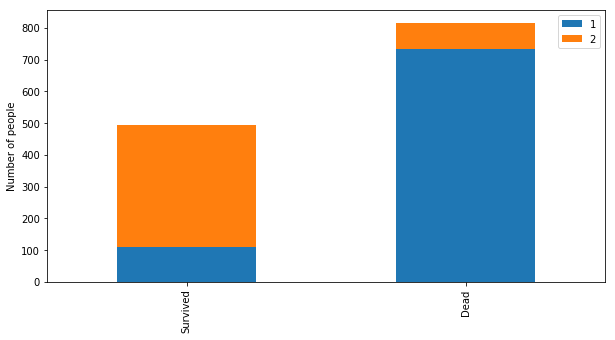

In [19]:
bar_chart('Sex')

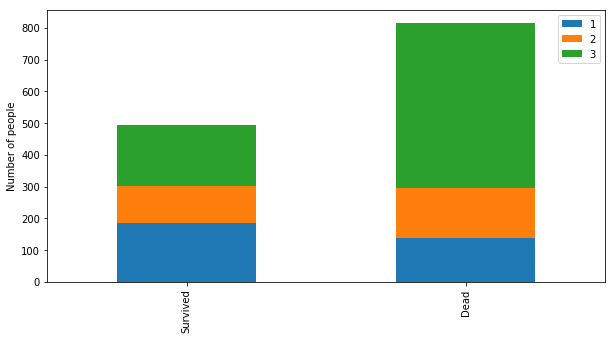

In [20]:
bar_chart('Pclass')

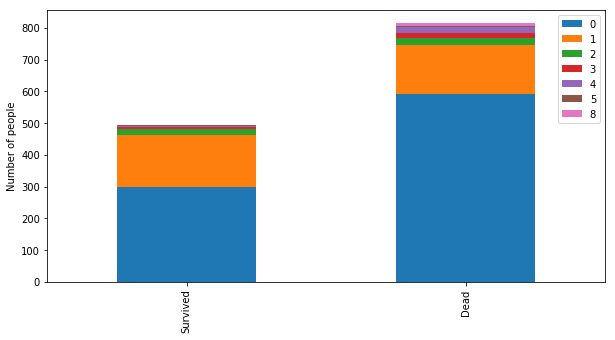

In [21]:
bar_chart('SibSp')

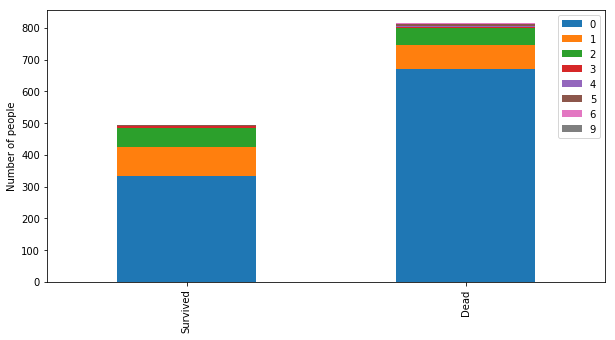

In [22]:
bar_chart('Parch')

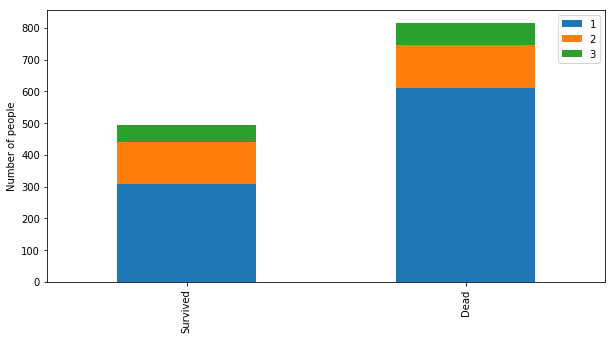

In [23]:
bar_chart('Embarked')

In [24]:
print("CORRELATION MATRIX")
corr = result.corr()
corr.style.background_gradient()

CORRELATION MATRIX


,Age,Cabin,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived
Age,1,-0.238706,0.0432429,0.150985,-0.138404,0.0157623,-0.400022,-0.0614534,-0.239697,-0.0465807
Cabin,-0.238706,1,-0.0568682,-0.414702,-0.0366559,-0.0121018,0.561132,-0.0699462,0.0128216,-0.161513
Embarked,0.0432429,-0.0568682,1,-0.0764023,-0.0955231,0.0401426,0.0388754,0.120423,-0.0734611,0.111625
Fare,0.150985,-0.414702,-0.0764023,1,0.353165,0.00584618,-0.716431,0.23171,0.354622,0.275107
Parch,-0.138404,-0.0366559,-0.0955231,0.353165,1,0.00894208,0.0183222,0.213125,0.373587,0.108919
PassengerId,0.0157623,-0.0121018,0.0401426,0.00584618,0.00894208,1,-0.0383544,-0.0134057,-0.055224,-0.0203697
Pclass,-0.400022,0.561132,0.0388754,-0.716431,0.0183222,-0.0383544,1,-0.124617,0.060832,-0.26471
Sex,-0.0614534,-0.0699462,0.120423,0.23171,0.213125,-0.0134057,-0.124617,1,0.109609,0.688371
SibSp,-0.239697,0.0128216,-0.0734611,0.354622,0.373587,-0.055224,0.060832,0.109609,1,0.00237035
Survived,-0.0465807,-0.161513,0.111625,0.275107,0.108919,-0.0203697,-0.26471,0.688371,0.00237035,1


In [25]:
result.drop(columns = ['Name', 'Ticket'], inplace = True)

In [26]:
result.head()
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 10 columns):
Age            1046 non-null float64
Cabin          1309 non-null int64
Embarked       1309 non-null int64
Fare           1308 non-null float64
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null int64
SibSp          1309 non-null int64
Survived       1309 non-null int64
dtypes: float64(2), int64(8)
memory usage: 112.5 KB


In [27]:
#result['Age'] = pd.to_numeric(result['Age'])
result.drop(columns = ['Age', 'Fare'], inplace = True)
#result['Fare'] = pd.to_numeric(result['Fare'])
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 8 columns):
Cabin          1309 non-null int64
Embarked       1309 non-null int64
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null int64
SibSp          1309 non-null int64
Survived       1309 non-null int64
dtypes: int64(8)
memory usage: 92.0 KB


In [28]:
X = result.iloc[:,:-1]
y = result.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
dtree.fit(X_train, y_train)
# use the model to make predictions with the test data
y_pred = dtree.predict(X_test)
# how did our model perform?
#count_misclassified = (y_test != y_pred).sum()
#print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.86
